In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

(0.2, 0.3)

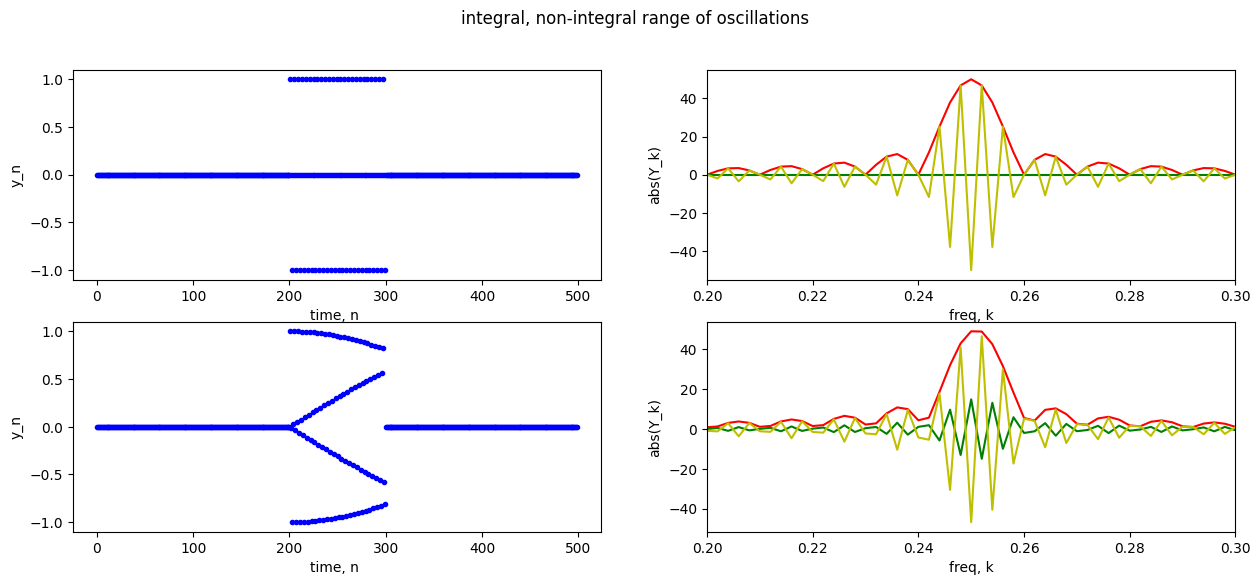

In [32]:
Npoints = 100
Npadding = 200
Nt = Npoints + 2 * Npadding

A_0 = 1.0 # signal 1
f_0 = 0.25
T_0 = 1. / f_0
phi_0 = 0.0

A_1 = 1.0 # signal 2
f_1 = 0.25+0.001
T_1 = 1. / f_1
phi_1 = 0.0

t = np.linspace(0,Npoints-1,num=Npoints)
y1 = A_0*np.sin(2*np.pi*f_0*t+phi_0) # < f_Nyquist = f_s / 2
y2 = A_1*np.sin(2*np.pi*f_1*t+phi_1) # > f_Nyquist = f_s / 2
y1 = np.pad(y1, (Npadding, Npadding), mode='constant', constant_values=0)
y2 = np.pad(y2, (Npadding, Npadding), mode='constant', constant_values=0)
ys = y1+y2
t = np.linspace(0,Nt-1,num=Nt)


#print(f_0,f_1)

# remember sin α sin β = ½ [cos(α – β) – cos(α + β)]
Y1 = fft(y1)[:Nt//2]       # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
Y2 = fft(y2)[:Nt//2]       # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
Ys = fft(y2)[:Nt//2]
f = fftfreq(Nt,1)[:Nt//2] # arguments are sample number, sample dt, & remove mirror

fig, axes = plt.subplots( 2, 2, figsize=(15, 6))
fig.suptitle('integral, non-integral range of oscillations')

axes[0][0].plot(t, y1, "b.")
axes[0][0].set_xlabel ('time, n ')
axes[0][0].set_ylabel ('y_n')
axes[0][1].plot(f, np.abs(Y1), "r")
axes[0][1].plot(f, np.real(Y1), "g")
axes[0][1].plot(f, np.imag(Y1), "y")
#axes[0][1].plot(f, 180./np.pi*np.angle(Y1), "m")
axes[0][1].set_xlabel ('freq, k')
axes[0][1].set_ylabel ('abs(Y_k)')
axes[0][1].set_xlim (f_0-.05,f_0+.05)

axes[1][0].plot(t, y2, "b.")
axes[1][0].set_xlabel ('time, n ')
axes[1][0].set_ylabel ('y_n')
axes[1][1].plot(f, np.abs(Y2), "r")
axes[1][1].plot(f, np.real(Y2), "g")
axes[1][1].plot(f, np.imag(Y2), "y")
#axes[1][1].plot(f, 180./np.pi*np.angle(Y2), "m")
axes[1][1].set_xlabel ('freq, k')
axes[1][1].set_ylabel ('abs(Y_k)')
axes[1][1].set_xlim (f_0-.05,f_0+.05)

#axes[2][0].plot(t, ys, "b.")
#axes[2][0].set_xlabel ('time, n ')
#axes[2][0].set_ylabel ('y_n')
#axes[2][1].plot(f, np.abs(Ys), "r")
#axes[2][1].plot(f, np.real(Ys), "g")
#axes[2][1].set_xlabel ('freq, k')
#axes[2][1].set_ylabel ('abs(Y_k)')
#axes[2][1].set_xlim (f_0-.05,f_0+.05)


In [ ]:
y = misc.electrocardiogram()
plt.plot(y)
Np = len(y)

f = fft(y)[0:Np//2]       # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
yf = fftfreq(Np,1)[:Np//2] # arguments are sample number, sample dt, &  remove mirror%
plt.plot(yf,abs(f))
plt.ylim(0,1)

In [ ]:
#y = np.cos(2*np.pi*f_o*t)
#y = signal.sawtooth(2*np.pi*f_o*t)
#y = signal.square(2*np.pi*f_o*t)
#y = signal.unit_impulse( Np, 250)